# Home Assignment 3. Correlation and linear regression
Probability and Statistics, Autumn 2020    
19.11.2020, Andrey Verbovskiy   
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)  

The following problems uses data from [OpenIntro Statistics](https://www.openintro.org/book/os/) Lab for Linear regression. The original R-data was read into R-studio and exported as csv-file. It's worth to read at least the introduction of the [original laboratory exercise](http://htmlpreview.github.io/?https://github.com/andrewpbray/oiLabs-base-R/blob/master/simple_regression/simple_regression.html). 

This assignment follows it's [Creative Commons Attribution-ShareAlike 3.0 Unported](https://creativecommons.org/licenses/by-sa/3.0/) license policy. 

*NOTE! The data file can be found from the same OMA assignment where you downloaded this Notebook.*

In [140]:
# Import libraries
%pylab inline
import pandas as pd
import seaborn as sns
from numpy import polyfit, polyval
from scipy.stats import linregress

Populating the interactive namespace from numpy and matplotlib


## Problem 1.

Coding:
- Read in the **mlbbat10.csv** file using pandas read_csv function.
- Calculate the descriptive statistics for [run](https://en.wikipedia.org/wiki/Run_(baseball)) and [at_bat](https://en.wikipedia.org/wiki/At_bat) variables.
- Plot histograms of the variables `run` and `at_bat`.
- Plot the relationship (=scatterplot) between the  Use `at_bat` as [predictor](https://en.wikipedia.org/wiki/Regression_analysis) and `run` as [dependent variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables).

Questions:
- Describe by words how does the relationship between `at_bat` and `run` look like.
- If you knew a player's time at bats (`at_bat`), would you be comfortable to predict the number of runs? Explain why.

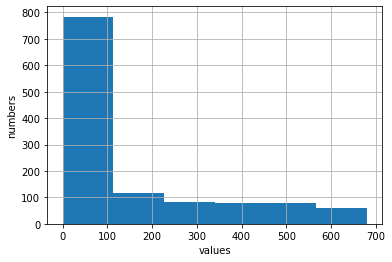

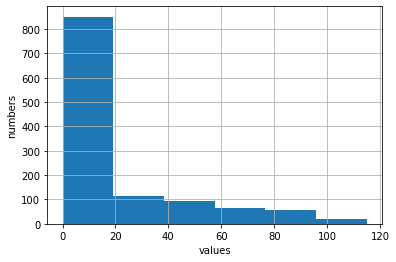

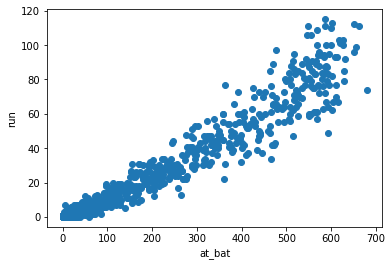

In [141]:
# Your code
file = 'mlbbat10.csv'
sep = ","
data = pd.read_csv(file, sep)
data.head()
data['run'].describe()
data['at_bat'].describe()

data['at_bat'].hist(bins=6)
plt.xlabel('values')
plt.ylabel('numbers')
plt.show()

data['run'].hist(bins=6)
plt.xlabel('values')
plt.ylabel('numbers')
plt.show()

plt.scatter(data['at_bat'], data['run'])
plt.xlabel('at_bat')
plt.ylabel('run')
plt.show()

**Answers:**

1) as lower the values of both at_bat and run are as more correlation can be observed, yet as greater the values are as more spread there is and less relationship.

2)if at_bat value is less than 300, then it would be possible to predict the number of runs as there is a good relationship in that area, yet if at_bat value is greater than 300, it becomes way harder to predict as the values are spread from each other significantly.


## Problem 2.

Coding:
- Calculate the correlation coefficient between the `run` and `at_bat`.
- Using any method (like `polyfit()` or `linregress()` or something else) find the best regression line that fits to the data of previous problem.
- Make a graph where you have drawn both the scatter-plot of the datapoints and the best fitting regression line for the data.
- Add into the title of the graph the results of the correlation calculations.
- Decorate the graph with suitable labels, grid-lines and use different colors for the scatter-plot and the regression line.

Questions:
- How the `at_bat` and `run` are correlated. Interpret the results of correlation calculations.
- If the player is `at_bat` 400 times in a year, what is his `run` score?
- How certain you would be about that value? Explain why.

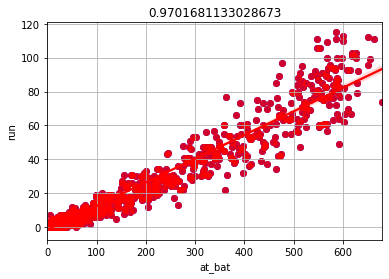

In [148]:
# Your code

covariance = cov(data['run'], data['at_bat'])
covariance

a = numpy.corrcoef(data['run'], data['at_bat']) #0.97016811
a

m = linregress(data['run'], data['at_bat'])
m


plt.scatter(data['at_bat'], data['run'],color = 'b' )
#p = polyfit(data['run'], data['at_bat'], 1)
#x= arange(0,700)
#y=polyval(p,x)
#plot(x,y,'r')
sns.regplot(x=data['at_bat'], y=data['run'], color='r')
plt.title(m[2])
plt.xlabel('at_bat')
plt.ylabel('run')
grid()
show()

**Answers:**

1)Correlation is pretty strong as it is close to 1

2)It is most likely to be in the range of 40-60 according to the graph.

3)Most of the values are in this range, so the probability should be around 90%. However, if we take into account all the outcomes of 400, then the range would be from 30 to 60 and it is 100%.


## Problem 3.

The last problem is to see how the correlation changes when we use team-level statistics. 
- Write a code that calculates the mean values for `at_bat` and `run` for each `team`.
- Calculate the correlation coefficient for the mean values.
- Make a scatter plot `run` versus `at_bat` on team level. 
- Plot the best linear correlation line between `at_bat` and `run` on team level.

Questions:
- How well the team level `run` and `at_bat` correlate compared to the player level results (problem 2)?
- Which one would describe better (player level or team level) the correlation between these two variables? Explain why.

Tip: Try first to use Pandas DataFrame [groupby() functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) to group the data by teams and then calculate the mean values for each team and for the given variables.

In [143]:
# Your code
data.head()

groups = data.groupby('team')
n = groups['run'].mean()
n.mean()

18.052442764051534

In [144]:
groups1 = data.groupby('team')
groups1['at_bat'].mean()
k = groups1['at_bat'].mean()
k.mean()

139.7832992522844

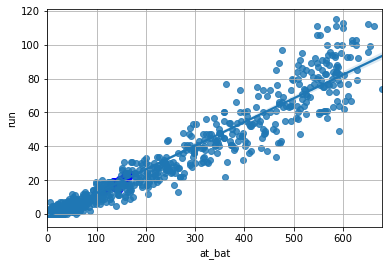

In [152]:
w = numpy.corrcoef(n, k) #0.84701315
w

plt.scatter(k, n,color = 'b' )
sns.regplot(x=data['at_bat'], y=data['run'])
plt.xlabel('at_bat')
plt.ylabel('run')
grid()
show()

**Answers:**

1)The previous correlation was better as it's value is way closer to 1.

2)The second one, as the correlation coefficient is higher.